### Manipulating the training data on the fly
What is real cool in Lasagne is the ability to easily manipulate the training (and test-data) on the fly. This often done in a random fashion by applying transformations under which the objects are invariant. All winners of competitions do a **clever** data augmentation. So let's give it a try... 

#### BatchIterator the point of entry
To do so one has to overwrite a BatchIterator and implement our own transform method. In the following, we simply flip the image on the y-axis, but in principle quite complex operations using cv2 or other libraries are possible.

#### Flipping
For the non-python freaks as me a short reminder that flipping can be done as follows:

In [10]:
a = (1,2,3,4)
a[::-1]

(4, 3, 2, 1)

#### Loading the data
We load the net and data from the last session via the import.

In [1]:
#We load the net and the data from the last example
from SimpleNet import net1,X,y 
X.shape

Couldn't import dot_parser, loading of dot files will not be possible.
Loaded data
After Batchnormalization (z-Trafo) Min / Max X / Mean -1.2488 / 66.487 / 8.03533e-10
Loaded pixels


Using gpu device 1: GeForce GTX 780


(70000, 1, 28, 28)

Fitting the model, with the standard BatchIterator which does not do on the fly manipulations.

In [2]:
d = net1.fit(X[0:1000,:,:,:],y[0:1000]); #Training with the 

  InputLayer        	(None, 1, 28, 28)   	produces     784 outputs
  Conv2DLayer       	(None, 32, 26, 26)  	produces   21632 outputs
  MaxPool2DLayer    	(None, 32, 13, 13)  	produces    5408 outputs
  Conv2DLayer       	(None, 64, 12, 12)  	produces    9216 outputs
  MaxPool2DLayer    	(None, 64, 6, 6)    	produces    2304 outputs
  DenseLayer        	(None, 500)         	produces     500 outputs
  DenseLayer        	(None, 10)          	produces      10 outputs

 Epoch  |  Train loss  |  Valid loss  |  Train / Val  |  Valid acc  |  Dur
--------|--------------|--------------|---------------|-------------|-------
     1  |    2.258153  |    2.115230  |     1.067569  |     44.18%  |  0.2s
     2  |    1.897879  |    1.666045  |     1.139152  |     59.77%  |  0.2s
     3  |    1.275311  |    1.028136  |     1.240411  |     70.64%  |  0.2s
     4  |    0.749278  |    0.756269  |     0.990755  |     75.88%  |  0.2s
     5  |    0.485058  |    0.675850  |     0.717700  |     81.13%  |  0.2

#### Custom BatchIterator
Now we create our own BatchIterator which does the flipping around the x-axis.

In [3]:
from nolearn.lasagne import BatchIterator

class SimpleBatchIterator(BatchIterator):

    def transform(self, Xb, yb):
        # The 'incomming' and outcomming shape is (10, 1, 28, 28)
        Xb, yb = super(SimpleBatchIterator, self).transform(Xb, yb)
        return Xb[:,:,:,::-1], yb #<--- Here we do the flipping of the images

# Setting the new batch iterator
net1.batch_iterator_train = SimpleBatchIterator(batch_size=10)
d = net1.fit(X[0:1000,:,:,:],y[0:1000])


  InputLayer        	(None, 1, 28, 28)   	produces     784 outputs
  Conv2DLayer       	(None, 32, 26, 26)  	produces   21632 outputs
  MaxPool2DLayer    	(None, 32, 13, 13)  	produces    5408 outputs
  Conv2DLayer       	(None, 64, 12, 12)  	produces    9216 outputs
  MaxPool2DLayer    	(None, 64, 6, 6)    	produces    2304 outputs
  DenseLayer        	(None, 500)         	produces     500 outputs
  DenseLayer        	(None, 10)          	produces      10 outputs

 Epoch  |  Train loss  |  Valid loss  |  Train / Val  |  Valid acc  |  Dur
--------|--------------|--------------|---------------|-------------|-------
     1  |    1.177006  |    1.519672  |     0.774513  |     49.59%  |  0.4s
     2  |    0.232858  |    1.997468  |     0.116576  |     47.90%  |  0.4s
     3  |    0.091646  |    2.844988  |     0.032213  |     41.37%  |  0.4s
     4  |    0.037566  |    3.467872  |     0.010833  |     36.92%  |  0.4s
     5  |    0.013306  |    3.597854  |     0.003698  |     43.34%  |  0.4

We also see that it takes a bit longer (0.4 sec), which is strange since in theory the flipping should be done on the CPU while the GPU is buisy doing the fitting. Maybe the network is not big enough to keep the GPU buissy? Anyway.

The second observation is that the performance drops from approx 80% to approx 40%. The reason is that maybe its not such a good idea to flip the training data in the first place. Any idea why?

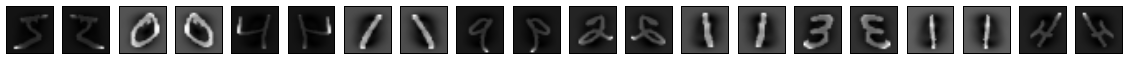

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
fig = plt.figure(figsize=(20,150))
for i in range(10):
    a=fig.add_subplot(1,20,2*i+1,xticks=[], yticks=[])
    plt.imshow(X[i,0,:,:], cmap=plt.get_cmap('gray'))
    a=fig.add_subplot(1,20,2*i+2,xticks=[], yticks=[])
    plt.imshow(X[i,0,:,::-1], cmap=plt.get_cmap('gray'))    

**Maybe we should do a more clever data augmentation next time...** At least we have the toolbox ready.

If overwritting the `transform` method is not sufficient, one might even overwrite the `__iter__` method in the BatchIterator.